## Population Model

**Besides the logistic population model, there is another popular discrete population model --- Hassell's model, which is good for handeling largely fluctuating populations such as insects.**

Original paper: \
M. P. Hassell (1975) *Density-Dependence in Single-Species Populations*, Anim. Ecol., 44:283-295. \
Other references: \
A. C. Crombie (1946) *On competition between different species of graminivorous insects*, Proc. R. Soc., 132:362-395. \
https://jmahaffy.sdsu.edu/courses/s00a/math121/lectures/qual_discrete/qualdiscrete.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In 1946, Crombie studied saw-tooth grain beetle population. He controlled the food supply strictly at a constant level, 10 grams of cracked wheat were added weekly. Counted and recorded the beetle populations.
 
<img src="img/Beetle_population.png" style="width: 300px;"/>

We enter the time (in weeks) and the beetle population into two arrays $t$ and $x$.

In [2]:
t = np.arange(0,32,2)
x = np.array([4, 4, 25, 63, 147, 285, 345, 361, 405, 471, 420, 430, 420, 475, 435, 480])

### Logistic Model
Try to fit the logistic model first. $x_n$ = beetle population at week $2n$.
We know for logistic model,
$$x_{n+1} = (c+1-\frac{c}{K}x_n)x_n,$$ where $K$ is the carrying capacity.
Let's plot the ($x_n, x_{n+1}$) graph for the data.

In [3]:
def logistic(c, K, x):
    return (c+1-c/K*x)*x

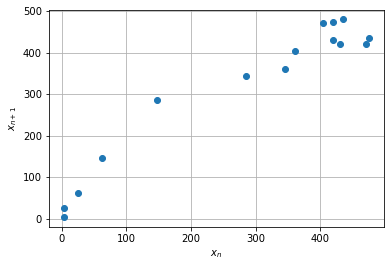

In [4]:
N = len(x)
plt.plot(x[0:N-1], x[1:N], 'o')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.grid()
plt.show()

To fit the logistic model, we need to find $c$ and $K$. \
Instead of directly fitting a quadratic curve, we want to consider
$$\frac{x_{n+1}}{x_n} = c+1-\frac{c}{K}x_n$$
Define $y_n=\frac{x_{n+1}}{x_n}$, then $y_n = c+1-\frac{c}{K}x_n$.
Use linear least squares regression. \
Use NumPy *polyfit* function, and choose degree to be 1.
Find best fit quadratic curve $a_1x+a_2$.
The *polyfit* function returns the coefficients in *decreasing* degree.
$$c=a_2-1, K=-\frac{c}{a_1}$$

c = 2.03, K = 417.97


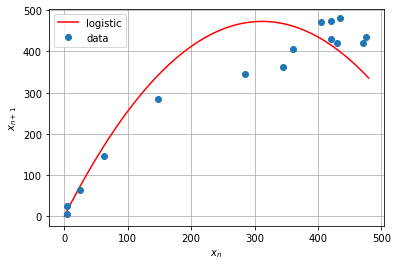

In [5]:
# Find the coefficients
y = x[1:N]/x[0:N-1]
a1, a2 = np.polyfit(x[0:N-1], y, 1)
c = a2-1
K = -c/a1
print(f'c = {c:.2f}, K = {K:.2f}')
x_eval = np.linspace(0, max(x), 100)
logistic_polyfit = logistic(c, K, x_eval)

# Plot the quadratic curve
plt.plot(x_eval, logistic_polyfit, 'r-', label='logistic')
plt.plot(x[0:N-1], x[1:N], 'o', label='data')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.legend()
plt.grid()
plt.show()

### Hassell's model
For Hassell's model,
$$x_{n+1} = \frac{\lambda}{(1+ax_n)^b}x_n.$$
We will not directly fit a curve to this. Instead, consider
\begin{align*}
\frac{x_{n+1}}{x_n} &= \lambda(1+ax_n)^{-b} \\
log \frac{x_{n+1}}{x_n} &= log\lambda - b \cdot log(1+ax_n)
\end{align*}

Define $y_n=\frac{x_{n+1}}{x_n}$, then $log y_n = log\lambda - b \cdot log(1+ax_n)$.

For different $a$ values, \
(i) do least squares linear regression to find best $\lambda$ and $b$ \
(ii) calculate the squared error sum between the fitted Hassell's model curve and the $(x_n, x_{n+1})$ data points \
Finally, find the optimal $a$ which minimizes the squared error sum.

In [6]:
def Hassell(lamda, a, b, x):
    return lamda / (1+a*x)**b * x

def error_calc(a, x, y, data):
    b1, b2 = np.polyfit(np.log(1+a*x), np.log(y), 1)
    b = -b1
    lamda = np.exp(b2)
    Hassell_fit = Hassell(lamda, a, b, x)
    error = sum((data - Hassell_fit)**2)
    return b, lamda, error

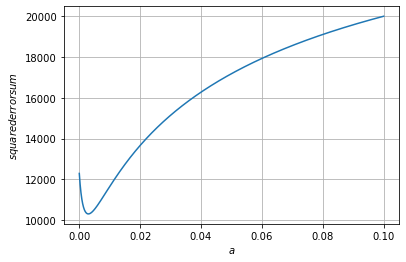

Smallest error is 10303.67 with a = 0.00298


In [7]:
a_vec = np.linspace(1e-6, 0.1, 10000)
error_vec = np.zeros(10000)

for i in range(len(a_vec)):
    a = a_vec[i]
    b, lamda, error = error_calc(a, x[0:N-1], y, x[1:N])
    error_vec[i] = error

plt.plot(a_vec, error_vec)
plt.xlabel('$a$')
plt.ylabel('$squared error sum$')
plt.grid()
plt.show()

error_min = min(error_vec)
a = a_vec[list(error_vec).index(error_min)]
print(f'Smallest error is {error_min:.2f} with a = {a:.5f}')

lambda = 2.67617
a = 0.00298
b = 1.17178


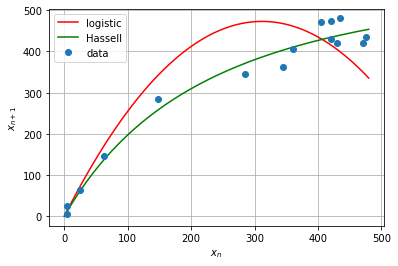

Error using logistic is 59454.47
Error using Hassell model is 10303.67


In [8]:
b, lamda, error = error_calc(a, x[0:N-1], y, x[1:N])
print(f'lambda = {lamda:.5f}')
print(f'a = {a:.5f}')
print(f'b = {b:.5f}')
Hassell_fit = Hassell(lamda, a, b, x_eval)

plt.plot(x_eval, logistic_polyfit, 'r-', label='logistic')
plt.plot(x_eval, Hassell_fit, 'g-', label='Hassell')
plt.plot(x[0:N-1], x[1:N], 'o', label='data')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.legend()
plt.grid()
plt.show()

logistic_error = sum((x[1:N] - logistic(c, K, x[0:N-1]))**2)
print(f'Error using logistic is {logistic_error:.2f}')
print(f'Error using Hassell model is {error:.2f}')

### Fixed point and stability analysis

For Hassell's model,
$$x_{n+1} = \frac{\lambda}{(1+ax_n)^b}x_n.$$
So the $f$ map is $f(x_n) = \frac{\lambda}{(1+ax_n)^b}x_n$,
for a fixed point $x^*$, we need $f(x^*)=x^*$.
Hence,
\begin{align*}
\frac{\lambda}{(1+ax^*)^b} x^* &= x^* \\
x^* \big (\frac{\lambda}{(1+ax^*)^b} - 1 \big ) &= 0 \\
\end{align*}

We get fixed points $x^* = 0$, or $x^* = \frac{\lambda^{1/b}-1}{a}$

In [9]:
x_star_hassell = (lamda**(1/b)-1) / a
print(x_star_hassell)

441.60749291100376


For stability check, $f'(x)=\lambda\cdot\frac{1+ax-abx}{(1+ax)^{b+1}}$.
So at fixed point $x^*=0$, $f'(x^*)=\lambda>1$, unstable.
For the other fixed point $x^* = \frac{\lambda^{1/b}-1}{a}$, let's calculate $f'(x^*)$.

In [10]:
f_deriv = lamda * (1+a*x_star_hassell-a*b*x_star_hassell) / (1+a*x_star_hassell)**(b+1)
print(f_deriv)

0.33405114538788433


Hence, $x^* = \frac{\lambda^{1/b}-1}{a}$ is a stable fixed point.

For logistic model, the unstable fixed point is 0, and the stable fixed point is $K$.

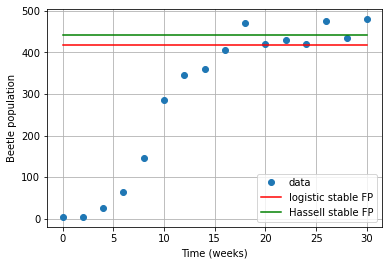

In [11]:
plt.plot(t, x, 'o', label='data')
plt.plot(t, np.ones(len(t))*K, 'r-', label='logistic stable FP')
plt.plot(t, np.ones(len(t))*x_star_hassell, 'g-', label='Hassell stable FP')
plt.xlabel('Time (weeks)')
plt.ylabel('Beetle population')
plt.legend()
plt.grid()
plt.show()

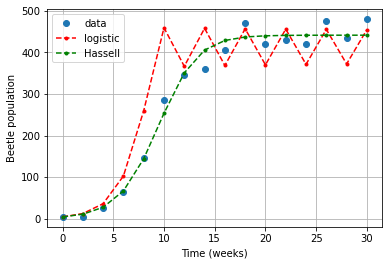

In [12]:
# Calculate the population at each step using logistic and Hassell model
x_logistic = np.zeros(N)
x_logistic[0] = x[0]
x_Hassell = np.zeros(N)
x_Hassell[0] = x[0]

for i in range(1,N):
    x_logistic[i] = logistic(c, K, x_logistic[i-1])
    x_Hassell[i] = Hassell(lamda, a, b, x_Hassell[i-1])
    
plt.plot(t, x, 'o', label='data')
plt.plot(t, x_logistic, 'r--.', label='logistic')
plt.plot(t, x_Hassell, 'g--.', label='Hassell')
plt.xlabel('Time (weeks)')
plt.ylabel('Beetle population')
plt.legend()
plt.grid()
plt.show()